In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

# Boolean Indexing

- Filtering data from a dataset is one of the most common and basic operations.
- Boolean indexing refers to selecting rows by providing a boolean value (True or False) for each row.
- These boolean values are usually stored in a Series or NumPy ndarray and are usually created by applying a boolean condition to one or more columns in a DataFrame.
- We begin by creating boolean Series and calculating statistics on them and then move on tocreating more complex conditionals before using boolean indexing in a wide variety of ways to filter data.

## Calculating boolean statistics

In [7]:
#Read in the movie dataset, set the index to the movie title, and inspect the first few rows
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [8]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
# Determine whether the duration of each movie is longer than two hours by using the greater than comparison operator with the duration Series
movie_2_hours = movie['duration'] > 120

In [10]:
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [11]:
# We can now use this Series to determine the number of movies that are longer than two hours
movie_2_hours.sum()

1039

In [12]:
# To find the percentage of movies in the dataset longer than two hours, use the mean method
movie_2_hours.mean()
# the the output is misleading

0.2113506916192026

In [13]:
# the output from step 4 is misleading look in the book
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [14]:
# Use the describe method to output a few summary statistics on the boolean Series
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

## Constructing multiple boolean conditions

In [15]:
# Load in the movie dataset and set the index as the title
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [16]:
# Create a variable to hold each set of criteria independently as a boolean Series
criteria1 = movie.imdb_score > 8

In [22]:
criteria2 = movie.content_rating == 'PG-13'

In [18]:
criteria3 = ((movie.title_year < 2000) |
 (movie.title_year > 2009))

In [19]:
criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [20]:
# Combine all the criteria together into a single boolean Series
criteria_final = criteria1 & criteria2 & criteria3

In [21]:
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

## Filtering with boolean indexing

In [23]:
# Read in the movie dataset, set the index to the movie_title, and create the first set of criteria
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [24]:
crit_a1 = movie.imdb_score > 8

In [25]:
crit_a2 = movie.content_rating == 'PG-13'

In [26]:
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)

In [27]:
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [28]:
# Create criteria for the second set of movies
crit_b1 = movie.imdb_score < 5

In [29]:
crit_b2 = movie.content_rating == 'R'

In [30]:
crit_b3 = ((movie.title_year >= 2000) & (movie.title_year <= 2010))

In [31]:
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [32]:
# Combine the two sets of criteria using the pandas or operator.
# This yields a boolean Series of all movies that are members of either set
final_crit_all = final_crit_a | final_crit_b

In [33]:
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [34]:
# pass boolean Series to the indexing operator to filter the data
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [35]:
# Let's filter both rows and columns with the .loc indexer
cols = ['imdb_score', 'content_rating', 'title_year']

In [36]:
movie_filtered = movie.loc[final_crit_all, cols]

In [37]:
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


## Replicating boolean indexing with index selection

In [38]:
# Read in the college dataset and use boolean indexing to select all institutions from the state of Texas (TX)
college = pd.read_csv('data/college.csv')

In [39]:
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [40]:
# To replicate this using index selection, we need to move the STABBR column into the index.
# We can then use label-based selection with the .loc indexer
college2 = college.set_index('STABBR')

In [41]:
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [44]:
# compare the speed of both methods
%timeit college[college['STABBR'] == 'TX']

1.83 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
 %timeit college2.loc['TX']

918 µs ± 99.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
%timeit college2 = college.set_index('STABBR')

2.5 ms ± 96.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Selecting with unique and sorted indexes

In [47]:
# Read in the college dataset, create a separate DataFrame with STABBR as the index, and check whether the index is sorted
college = pd.read_csv('data/college.csv')

In [48]:
college2 = college.set_index('STABBR')

In [49]:
college2.index.is_monotonic

False

In [50]:
# Sort the index from college2 and store it as another object
college3 = college2.sort_index()

In [51]:
college3.index.is_monotonic

True

In [52]:
# Time the selection of the state of Texas (TX) from all three DataFrames
%timeit college[college['STABBR'] == 'TX']

1.88 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
%timeit college2.loc['TX']

888 µs ± 67.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [54]:
%timeit college3.loc['TX']

249 µs ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
college_unique = college.set_index('INSTNM')

In [56]:
college_unique.index.is_unique

True

In [57]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [58]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [59]:
%timeit college[college['INSTNM'] == 'Stanford University']

1.66 ms ± 81.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [60]:
%timeit college_unique.loc['Stanford University']

205 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Gaining perspective on stock prices

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#Read in the Schlumberger stock data, put the Date column into the index, and convert it to a DatetimeIndex
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])

In [8]:
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [9]:
# Select the closing price as a Series and use the describe method to return summary statistics as a Series
slb_close = slb['Close']

In [10]:
slb_summary = slb_close.describe(percentiles=[.1, .9])

In [11]:
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [12]:
# Using boolean selection, select all closing prices in the upper or lower tenth percentile
upper_10 = slb_summary.loc['90%']

In [13]:
lower_10 = slb_summary.loc['10%']

In [14]:
criteria = (slb_close < lower_10) | (slb_close > upper_10)

In [15]:
slb_top_bottom_10 = slb_close[criteria]

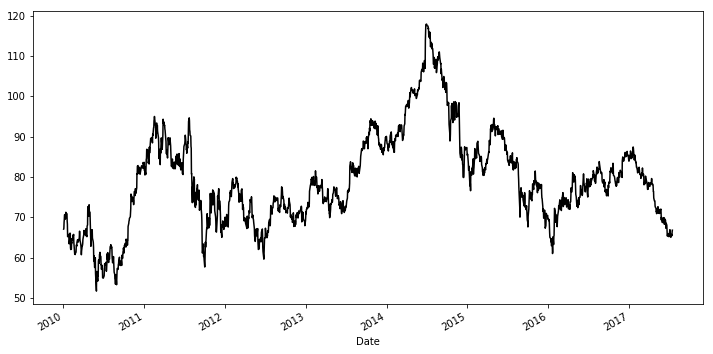

In [16]:
# Plot the resulting filtered Series in light gray on top of all closing prices in black.
# Use the matplotlib library to draw horizontal lines at the tenth and ninetieth percentiles
slb_close.plot(color='black', figsize=(12,6))

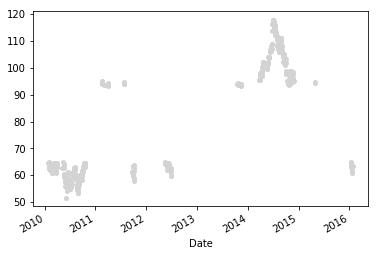

In [17]:
slb_top_bottom_10.plot(marker='o', style=' ',
 ms=4, color='lightgray')

In [18]:
xmin = criteria.index[0]

In [19]:
xmax = criteria.index[-1]

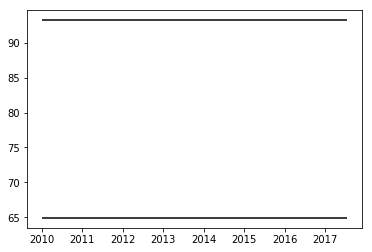

In [20]:
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='black')

Instead of plotting red points (black points) over the closing prices to indicate the upper and
lower tenth percentiles, we can use matplotlib's fill_between function. This function fills
in all the areas between two lines. It takes an optional where parameter that accepts a
boolean Series, alerting it to exactly which locations to fill in

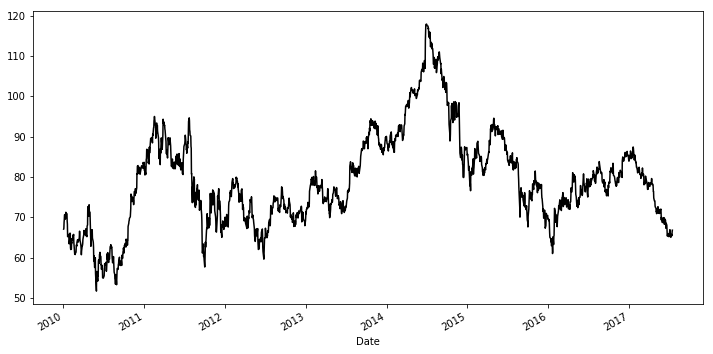

In [21]:
slb_close.plot(color='black', figsize=(12,6))

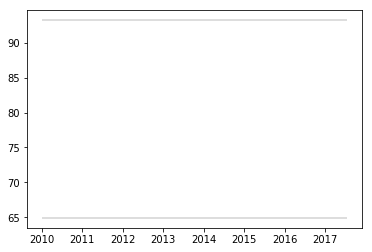

In [22]:
plt.hlines(y=[lower_10, upper_10],
 xmin=xmin, xmax=xmax,color='lightgray')

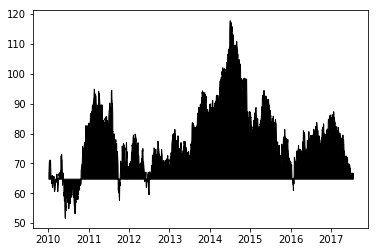

In [23]:
plt.fill_between(x=criteria.index, y1=lower_10,
 y2=slb_close.values, color='black')

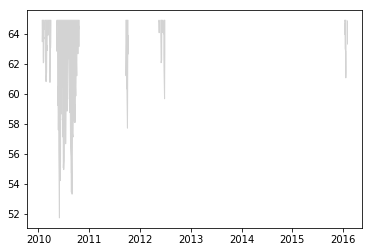

In [24]:
plt.fill_between(x=criteria.index,y1=lower_10,
 y2=slb_close.values, where=slb_close < lower_10,
 color='lightgray')

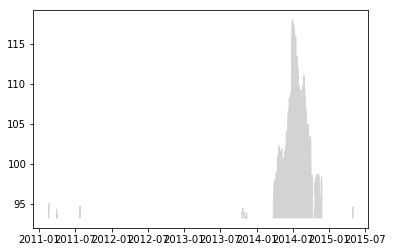

In [25]:
plt.fill_between(x=criteria.index, y1=upper_10,
 y2=slb_close.values, where=slb_close > upper_10,
 color='lightgray')

## Translating SQL WHERE clauses

Many pandas users will have a background processing data directly from databases using
the ubiquitous Structured Query Language (SQL). SQL is a standardized language to
define, manipulate, and control data stored in a database. The SELECT statement is the most
common way to use SQL to select, filter, aggregate, and order data. Pandas has the ability to
connect to databases and send SQL statements to them

In [26]:
# Read in the employee dataset as a DataFrame
employee = pd.read_csv('data/employee.csv')

In [27]:
# Before filtering out the data, it is helpful to do some manual inspection of each of the filtered columns to know the exact values that will be used in the filter
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [28]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [29]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [30]:
# Write a single statement for each of the criteria. Use the isin method to test equality to one of many values
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']

In [31]:
criteria_dept = employee.DEPARTMENT.isin(depts)

In [32]:
criteria_gender = employee.GENDER == 'Female'

In [33]:
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [34]:
# Combine all the boolean Series together
criteria_final = (criteria_dept & criteria_gender & criteria_sal)

In [35]:
# Use boolean indexing to select only the rows that meet the final criteria
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [36]:
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


## Determining the normality of stock market returns

The normal distribution is heavily relied upon to describe many different populations of data. 
Although many random processes do appear to look like normal distributions most of the time, real-life tends to be more complex.
Stock market returns are a prime example of a distribution that can look fairly normal but in actuality be
quite far off

In [37]:
#Load Amazon stock data and set the date as the index
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])

In [38]:
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [39]:
# Create a Series by selecting only the closing price and then using the pct_change method to get the daily rate of return
amzn_daily_return = amzn.Close.pct_change()

In [40]:
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

In [42]:
# Drop the missing value and plot a histogram of the returns to visually inspect the distribution
amzn_daily_return = amzn_daily_return.dropna()

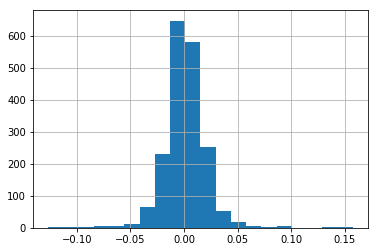

In [43]:
amzn_daily_return.hist(bins=20)

Normal distributions approximately follow the 68-95-99.7 rule--meaning that 68%
of the data falls between 1 standard deviation of the mean, 95% between 2, and
99.7% between 3. We will now calculate the percentage of daily returns that fall
between 1, 2, and 3 standard deviations from the mean. For this, we will need the
mean and standard deviation

In [44]:
mean = amzn_daily_return.mean()

In [45]:
std = amzn_daily_return.std()

In [46]:
#Calculate the absolute value of the z-score for each observation. 
#The z-score is the number of standard deviations away from the mean
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [47]:
# Find the percentage of returns that are within 1, 2, and 3 standard deviations
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]

In [48]:
print('{:.3f} fall within 1 standard deviation. ' '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


## Improving readability of boolean indexing with the query method

In [49]:
#The goal here is to filter the employee data for female employees from the police or fire departments that earn a salary between 80 and 120 thousand dollars
# Read in the employee data, assign the chosen departments, and import columns to variables
employee = pd.read_csv('data/employee.csv')

In [50]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']

In [51]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT',  'GENDER', 'BASE_SALARY']

In [52]:
# Build the query string and execute the method
qs = "DEPARTMENT in @depts " "and GENDER == 'Female' " "and 80000 <= BASE_SALARY <= 120000"

In [53]:
emp_filtered = employee.query(qs)

In [54]:
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


## Preserving Series with the where method

In [55]:
# Read the movie dataset, set the movie title as the index, and select all the values in the actor_1_facebook_likes column that are not missing
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [56]:
fb_likes = movie['actor_1_facebook_likes'].dropna()

In [57]:
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [58]:
#use the describe method to get a sense of the distribution
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]) .astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

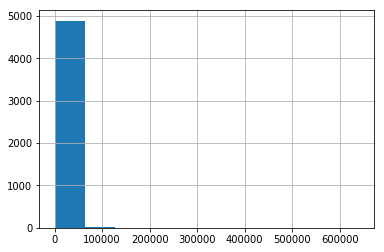

In [60]:
#  plot a histogram of this Series to visually inspect the distribution
fb_likes.hist()

In [61]:
# Create criteria to test whether the number of likes is less than 20,000
criteria_high = fb_likes < 20000

In [62]:
criteria_high.mean().round(2)

0.91

In [63]:
# use the where method, which accepts a boolean condition. 
#The default behavior is to return a Series the same size as the original but which has all the False locations replaced with a missing value
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [64]:
# The second parameter to the where method, other, allows you to control the replacement value. Let's change all the missing values to 20,000
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [65]:
# Create criteria to put a floor on the minimum number of likes.
# chain another where method and replace the values not meeting with the condition to 300
criteria_low = fb_likes > 300

In [66]:
fb_likes_cap = fb_likes.where(criteria_high, other=20000) .where(criteria_low, 300)

In [67]:
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [68]:
# The length of the original Series and modified Series is the same
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

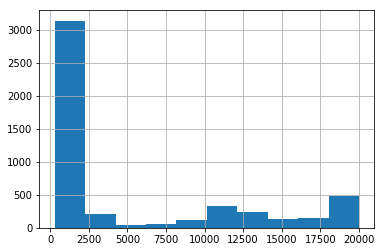

In [69]:
#  make a histogram with the modified Series. 
#With the data in a much tighter range, it should produce a better plot
fb_likes_cap.hist()

## Masking DataFrame rows

In [70]:
# Read the movie dataset, set the movie title as the index, and create the criteria
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [71]:
c1 = movie['title_year'] >= 2010

In [72]:
c2 = movie['title_year'].isnull()

In [73]:
criteria = c1 | c2

In [74]:
# Use the mask method on a DataFrame to make all the values in rows with movies that were made from 2010 onward missing
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Chain the dropna method to remove rows that have all values missing
movie_mask = movie.mask(criteria).dropna(how='all')

In [76]:
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [77]:
# check whether the two methods produce the same DataFrame
movie_boolean = movie[movie['title_year'] < 2010]

In [78]:
movie_mask.equals(movie_boolean)

False

In [79]:
# The equals method is telling us that they aren't equal.
# Do some sanity checking and see if they are the same shape
movie_mask.shape == movie_boolean.shape

True

In [81]:
#  Let's check the equality of the data types to see whether the equals method returns False if the data types of the columns are different, even if the values are the same
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [82]:
# Pandas has a testing module, which primarily is a function, assert_frame_equal, that allows you to
# check the equality of Series and DataFrames without also checking the equality of the data types
from pandas.testing import assert_frame_equal

In [83]:
assert_frame_equal(movie_boolean, movie_mask, check_dtype=False)

## Selecting with booleans, integer location, and labels

In [85]:
# Read in the movie dataset, set the index as the title, and then create a boolean Series matching all movies with a content rating of G and an IMDB score less than 4
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [86]:
c1 = movie['content_rating'] == 'G'

In [87]:
c2 = movie['imdb_score'] < 4

In [88]:
criteria = c1 & c2

In [89]:
# pass these criteria to the .loc indexer to filter the rows
movie_loc = movie.loc[criteria]

In [90]:
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [91]:
#  check whether this DataFrame is exactly equal to the one generated directly from the indexing operator
movie_loc.equals(movie[criteria])

True

In [92]:
# we cannot directly use a Series of booleans because of the index.
# We can, however, use an ndarray of booleans. To extract the array, use the values attribute
movie_iloc = movie.iloc[criteria.values]

In [93]:
movie_iloc.equals(movie_loc)

True

In [94]:
# it is possible to do boolean indexing to select particular columns. 
#Here, we select all the columns that have a data type of 64-bit integers
criteria_col = movie.dtypes == np.int64

In [95]:
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [96]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [97]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [98]:
# A boolean Series may be used to select rows and then simultaneously select columns with either integers or labels.
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']

In [99]:
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [100]:
# This same operation may be replicated with .iloc, but you need to get the integer location of all the columns
col_index = [movie.columns.get_loc(col) for col in cols]

In [101]:
col_index

[20, 24, 22, 8]

In [102]:
movie.iloc[criteria.values, col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
